In [48]:
import numpy as np
import matplotlib.pyplot as plt 

In [49]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=7000, noise=0.4, random_state=42)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

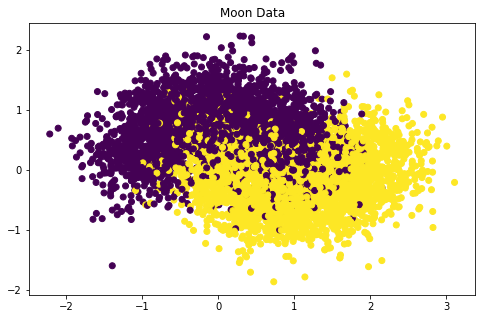

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title('Moon Data')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [53]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2,100)), 'min_samples_split': [2,3,4], 'max_depth': list(range(2,50))}
grid_search_cv = GridSearchCV(dt_clf, params, n_jobs=-1, verbose=2, cv=5)

grid_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 14112 candidates, totalling 70560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 8112 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 17168 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 28848 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 38460 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 43212 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 50496 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 58764 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 67992 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 70560 out of 70560 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
   

In [54]:
dt_best_estimator = grid_search_cv.best_estimator_
dt_best_estimator

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [55]:
grid_search_cv.best_score_

0.8610714285714286

In [56]:
from sklearn.metrics import accuracy_score

y_predict = dt_best_estimator.predict(X_test)
accuracy_score(y_test, y_predict)

0.8471428571428572

In [57]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100,
        bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train,y_train)
y_predict_bag = bag_clf.predict(X_test)

In [58]:
accuracy_score(y_test, y_predict_bag)

0.865

In [59]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0.5, 1.0, 'Decision Trees with Bagging')

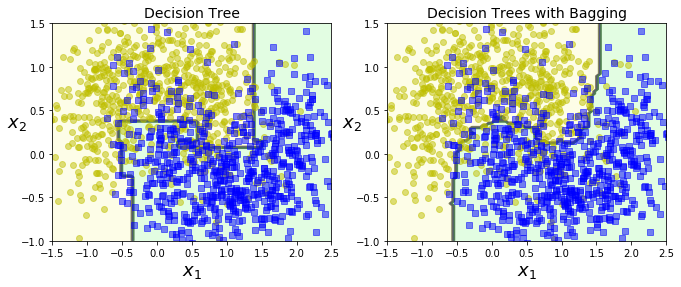

In [60]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(dt_best_estimator, X_test, y_test)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X_test, y_test)
plt.title("Decision Trees with Bagging", fontsize=14)

## Out of Bag Score

In [61]:
bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42), n_estimators=500, max_samples=100,
        bootstrap=True, n_jobs=-1, oob_score=True, random_state=42)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8616071428571429

In [62]:
y_predict_bag_oob = bag_clf.predict(X_test)
accuracy_score(y_test, y_predict_bag_oob)

0.865

In [63]:
from sklearn.ensemble import RandomForestClassifier

ran_for_clf = RandomForestClassifier(n_estimators=500, max_samples=100, n_jobs=-1, max_leaf_nodes=16, random_state=42)
ran_for_clf.fit(X_train,y_train)
y_predict_ranfor = ran_for_clf.predict(X_test)

In [64]:
accuracy_score(y_test, y_predict_ranfor)

0.8635714285714285

In [65]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(random_state=42, max_depth=1),
            n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train,y_train)
y_predict_adaboost = ada_clf.predict(X_test)

In [66]:
accuracy_score(y_test, y_predict_adaboost)

0.86

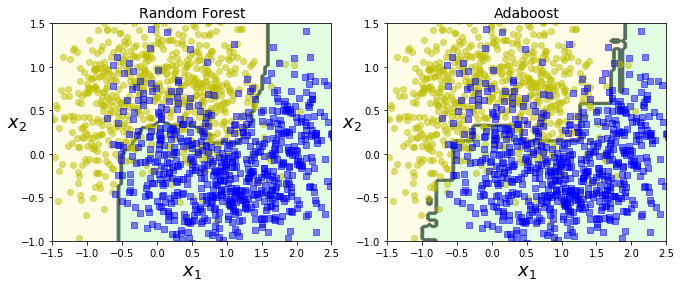

In [67]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(ran_for_clf, X_test, y_test)
plt.title("Random Forest", fontsize=14)
plt.subplot(122)
plot_decision_boundary(ada_clf, X_test, y_test)
plt.title("Adaboost", fontsize=14)
plt.show()